In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("spam.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


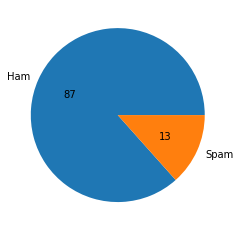

In [21]:
#The Dataset is Bias

import matplotlib.pyplot as plt
%matplotlib inline

plt.pie(data.Category.value_counts().values,labels=["Ham","Spam"],autopct="%.f")
plt.show()

In [24]:
!pip install nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
import string
import re

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    stop_words=stopwords.words("english")
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [26]:
data.Message = data['Message'].apply(data_processing)

In [30]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data
data.Message = data['Message'].apply(lambda x: stemming(x))

In [31]:
data.duplicated().sum()

460

In [34]:
data.shape

(5572, 2)

In [38]:
data.drop_duplicates(inplace=True)

In [39]:
data.shape

(5112, 2)

In [70]:
X=data.Message.values

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Category=le.fit_transform(data.Category)
y=data.Category.values

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=500)
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [89]:
from sklearn.svm import SVC

In [107]:
model = SVC(random_state = 0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [109]:
prediction=model.predict(X_test)

In [108]:
model.score(X_test,y_test)

0.9634941329856584

In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [112]:
acc=accuracy_score(y_test,prediction)
acc

0.9634941329856584

In [113]:
cm=confusion_matrix(y_test,prediction)
cm

array([[1346,    1],
       [  55,  132]], dtype=int64)